In [3]:
# importing important packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('Pokemon.csv')
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [5]:
df.columns = df.columns.str.lower().str.replace('_', ' ')
df.head()

,#,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
# Cleaning the data set
# Converting index column of the data set with name of the pokemon, 
# and getting rid of anything preceeding mega
df = df.set_index('name')
df.index = df.index.str.replace('.*(?=Mega)', '')
df.head()

,#,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
# Getting rid of index
df=df.drop(['#'], axis = 1)

In [8]:
# checking for null values
df.isnull().sum()

type 1          0
type 2        386
total           0
hp              0
attack          0
defense         0
sp. atk         0
sp. def         0
speed           0
generation      0
legendary       0
dtype: int64

In [9]:
# Replacing the type 2 NA values with type 1. This means that the pokemon is a pure single element 
# type 
df['type 2'].fillna(df['type 1'], inplace = True)

In [10]:
print(df.loc['Charizard'])
print('Max HP Pokemon:', (df['hp']).idxmax())
print('Max Defence Pokemon:', (df['defense']).idxmax())

type 1          Fire
type 2        Flying
total            534
hp                78
attack            84
defense           78
sp. atk          109
sp. def           85
speed            100
generation         1
legendary      False
Name: Charizard, dtype: object
Max HP Pokemon: Blissey
Max Defence Pokemon: Mega Steelix


In [11]:
print('The unique  pokemon types are',df['type 1'].unique()) #shows all the unique types in column
print('The number of unique types are',df['type 1'].nunique()) #shows count of unique values 

The unique  pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
The number of unique types are 18


In [12]:
print(df['type 1'].value_counts().sort_values(), '\n', df['type 2'].value_counts().sort_values())
# Here we can see that flying is not a common primary type but more secondary type

Flying        4
Fairy        17
Ice          24
Steel        27
Fighting     27
Poison       28
Dark         31
Ghost        32
Ground       32
Dragon       32
Rock         44
Electric     44
Fire         52
Psychic      57
Bug          69
Grass        70
Normal       98
Water       112
Name: type 1, dtype: int64 
 Bug         20
Rock        23
Ghost       24
Ice         27
Steel       27
Dragon      29
Dark        30
Electric    33
Fairy       38
Fire        40
Fighting    46
Ground      48
Poison      49
Grass       58
Normal      65
Psychic     71
Water       73
Flying      99
Name: type 2, dtype: int64


In [13]:
# Seeing the summary of the data set
df_summary = df.describe()
print(df_summary)

           total          hp      attack     defense     sp. atk     sp. def  \
count  800.00000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   435.10250   69.258750   79.001250   73.842500   72.820000   71.902500   
std    119.96304   25.534669   32.457366   31.183501   32.722294   27.828916   
min    180.00000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    330.00000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    450.00000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    515.00000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    780.00000  255.000000  190.000000  230.000000  194.000000  230.000000   

            speed  generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6

# Visualizations

#### A histogram todisplay the attack values of pokemons.
#### Looks like that about  185 pokemons that fall under the range of 63 - 75 have highest attack values
#### And the mean around 76 or 77

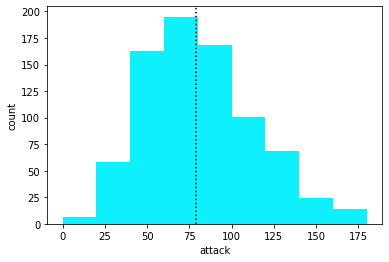

In [14]:
bins=range(0,200,20)
plt.hist(df['attack'], bins, histtype='bar', rwidth=1.2, color='#0ff0ff')
plt.xlabel('attack')
plt.ylabel('count')
plt.plot()
plt.axvline(df['attack'].mean(), linestyle='dotted', color='black')
plt.show()

##### Since childhood, there has always been a debate that dark pokemons have an edge over psychics. From this scatter plot diagram, we can see that psychics are more defensive and dark pokemon are more in the offensive There is one psychic pokemon which has the highest attack and mediocre defense, lets see which one is that , my gut says it is a legendary pokemon, because they generally have high stats 

D:\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  after removing the cwd from sys.path.
D:\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


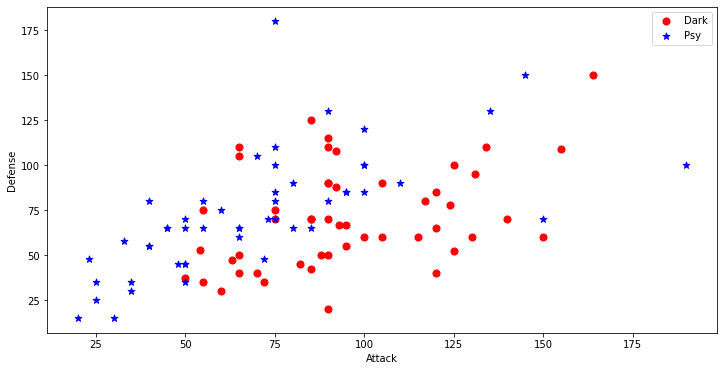

In [15]:
dark = df[(df['type 1'] == 'Dark') | ((df['type 2']) == 'Dark')]
psy = df[(df['type 1'] == 'Psychic') | ((df['type 2']) == 'Psychic')]
plt.scatter(dark.attack.head(50), dark.defense.head(50), color='R', label = 'Dark',
            marker='o', s=50)
plt.scatter(psy.attack.head(50), psy.defense.head(50), color='B', label = 'Psy', 
            marker='*', s=50)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()
plt.plot()
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [32]:
print(df.loc[(df['type 1'] == 'Psychic') & (df['attack'] > 175)])

                     type 1    type 2  total   hp  attack  defense  sp. atk  \
name                                                                          
Mega Mewtwo X       Psychic  Fighting    780  106     190      100      154   
DeoxysAttack Forme  Psychic   Psychic    600   50     180       20      180   

                    sp. def  speed  generation  legendary  
name                                                       
Mega Mewtwo X           100    130           1       True  
DeoxysAttack Forme       20    150           3       True  


##### As we can see, the special case for psychic is a legendary pokemon, Mewtwo

##### Lets make a pie chart portraying the percentage of different types of pokemon

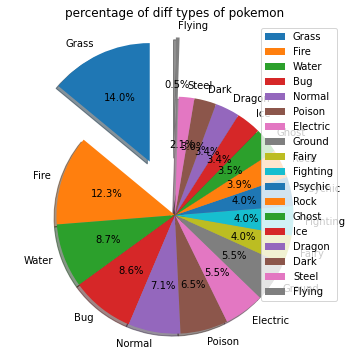

In [33]:
labels = df['type 1'].unique()
freq = df['type 1'].value_counts().to_list()
explode = [0 for x in range(len(freq))]
explode[0] = 0.5
explode[-1] = 0.5
plt.pie(freq, explode = explode, labels=labels, autopct = '%1.1f%%', 
        shadow = True, startangle = 90)
plt.axis('equal')
plt.title('percentage of diff types of pokemon')
plt.plot()
plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### A box plot to show number of pokemon in each generation

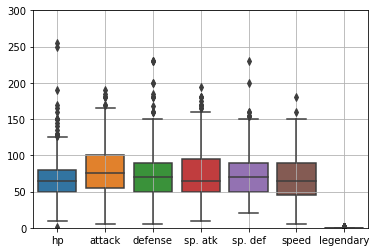

In [34]:
df2=df.drop(['generation','total'],axis=1)
sns.boxplot(data=df2)
plt.ylim(0,300) 
plt.grid()
plt.show()

##### Plotting a box plot to segregate types of pokemon with their attack damage. This way we can identify potential 'outliers' but special pokemons in this case

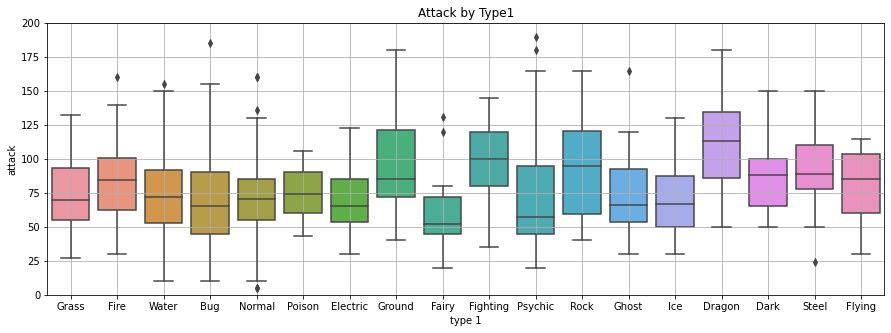

In [35]:
plt.subplots(figsize = (15,5))
plt.title('Attack by Type1')
sns.boxplot(x = "type 1", y = "attack",data = df)
plt.ylim(0,200)
plt.grid()
plt.show()

##### Plotting a violin plot to segregate secondary types of pokemon with their attack damage. Violin plots give us some information about the clusters. The width of the violins at any point is directly proportional to the number of pokemons having a certain attack damage.
##### As we can see, Rock, Fighting, Normal type pokemon follow a normal distribution while the others are skewed to a direction

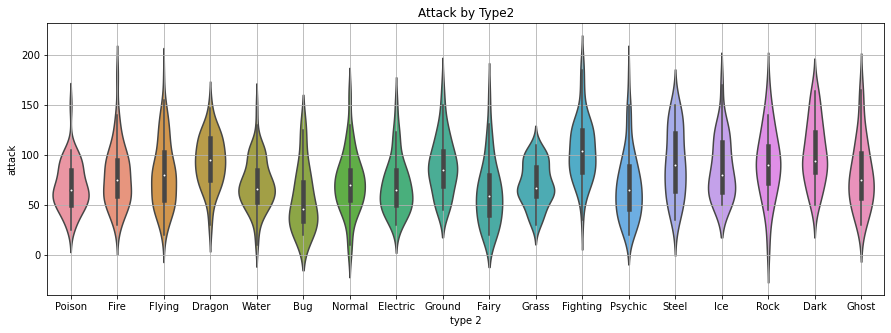

In [36]:
plt.subplots(figsize = (15,5))
plt.title('Attack by Type2')
sns.violinplot(x = "type 2", y = "attack",data=df)
plt.grid()

plt.show()

##### A violin plot to understand the defense distribution suggests that only a couple of types have a normal distribution namely normal and fairy. 
##### A match up between two normal pokemons will be a close one because both have notmally distibuted values for attack and defense

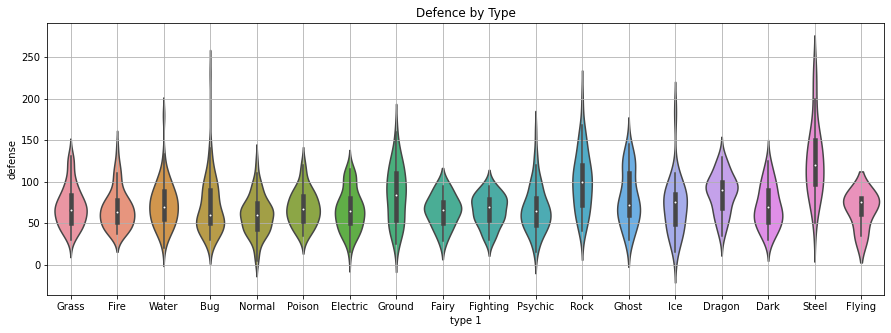

In [37]:
plt.subplots(figsize = (15,5))
plt.title('Defence by Type')
sns.violinplot(x = "type 1", y = "defense",data = df)
plt.grid()
plt.show()

##### Time to identify the strongest generation! Difficult to infer, I think generation 3 is the strongest, since it follows somewhat  a normal distribution.

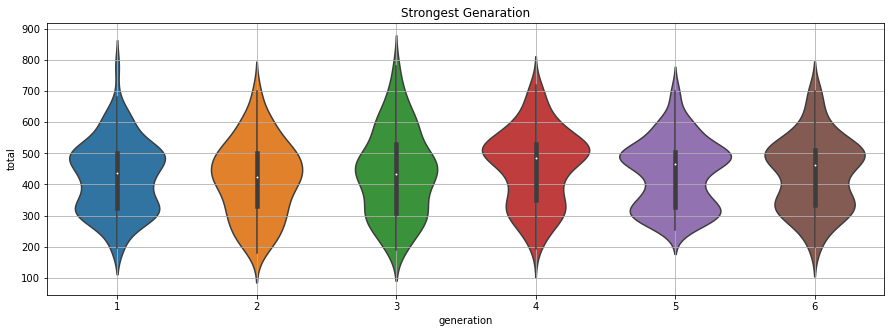

In [38]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Genaration')
sns.violinplot(x = "generation", y = "total",data = df)
plt.grid()
plt.show()

##### Everyone loves legendary pokemons right?! Ofcourse, they are super strong as they have extra-ordinary stats. This swarm plot will help locate and isolate legendary pokemons from others w.r.t theit total stats.

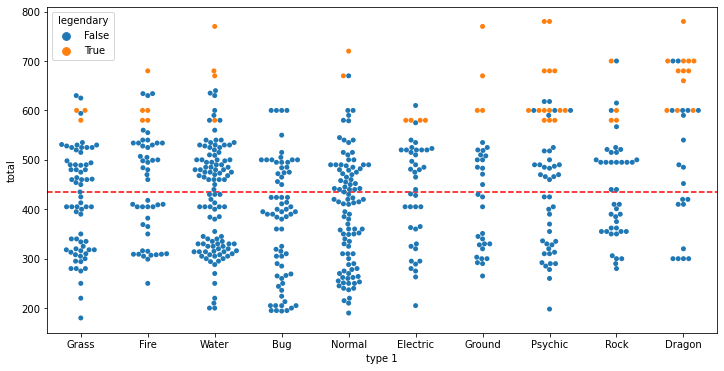

In [39]:
plt.figure(figsize=(12,6))
top_types=df['type 1'].value_counts()[:10] 
df1=df[df['type 1'].isin(top_types.index)] 
sns.swarmplot(x='type 1',y='total',data=df1,hue='legendary')
plt.axhline(df1['total'].mean(),color='red',linestyle='dashed')
plt.show()

##### Let us see how each attribute correlate to each other and identify which attributes have influence on the total strength of a pokemon. 
##### Looks like attack and spl. attack have the highest influence on total. Another interesting inference is that attributes other than total do not have a lot of correlation among them

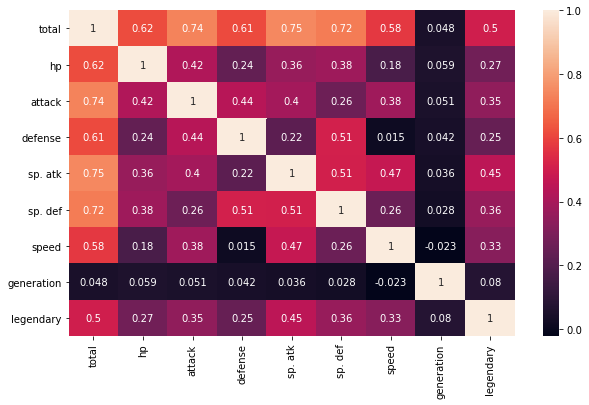

In [40]:
plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(),annot=True) 
plt.show()

#####  I am going to plot a graphs showing the number of pokemon of each type for each generation.

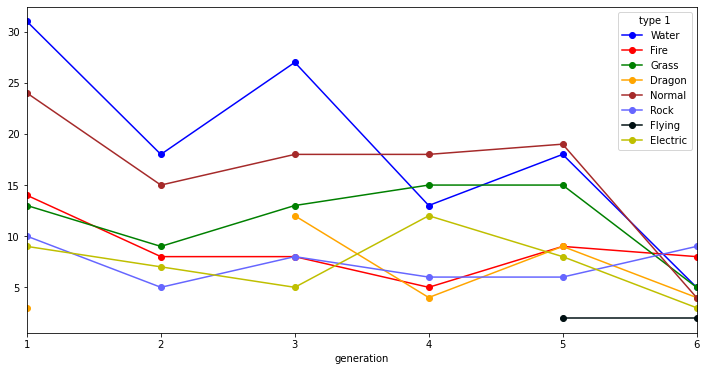

In [41]:
a=df.groupby(['generation','type 1']).count().reset_index()
a=a[['generation','type 1','total']]
a=a.pivot('generation','type 1','total')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

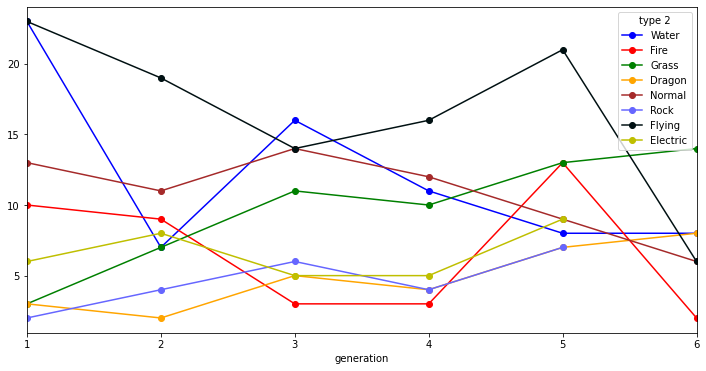

In [42]:
a=df.groupby(['generation','type 2']).count().reset_index()
a=a[['generation','type 2','total']]
a=a.pivot('generation','type 2','total')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

##### Gens 1-4 have no pokemons with primary type flying while almost every generation has most number of type 2 flying pokemon (except gen 3,  6)
##### Interesting fact, gen 2 doesn not have any dragon type pokemon